In [2]:
from mpl_toolkits.basemap import Basemap, cm, shiftgrid,maskoceans
from netCDF4 import Dataset as NetCDFFile
import numpy as N
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy.ma as ma
from scipy.interpolate import griddata
from pyresample import geometry,image, kd_tree


In [3]:
# Read in CH4 flux
#nclu=NetCDFFile('rcp45_9100_oxid.nc','r')
nclu=NetCDFFile('hist_0109.nc','r')
ncvar_maize = nclu.variables['ch4_flux'][:]
latnc = nclu.variables['lat'][:]
# znc = nclu.variables['level'][:]
lonnc = nclu.variables['lon'][:]
# timenc = nclu.variables['time'][:]
lonnc = ((lonnc - 180) % 360) - 180

# Read in wetland fraction and inundated fraction

# Calculate the wetland emission

# Read in Wetchart
#nclu3=NetCDFFile('wetcharts_mean_0910.nc4','r')
nclu3=NetCDFFile('ccc.nc4','r')
ncvar_maize2 = nclu3.variables['wetland_CH4_emissions'][:]
latnc2 = nclu3.variables['lat'][:]
# znc = nclu.variables['level'][:]
lonnc2 = nclu3.variables['lon'][:]
#lonnc2 = lonnc
pp = ncvar_maize2[0,0,:,:]


/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


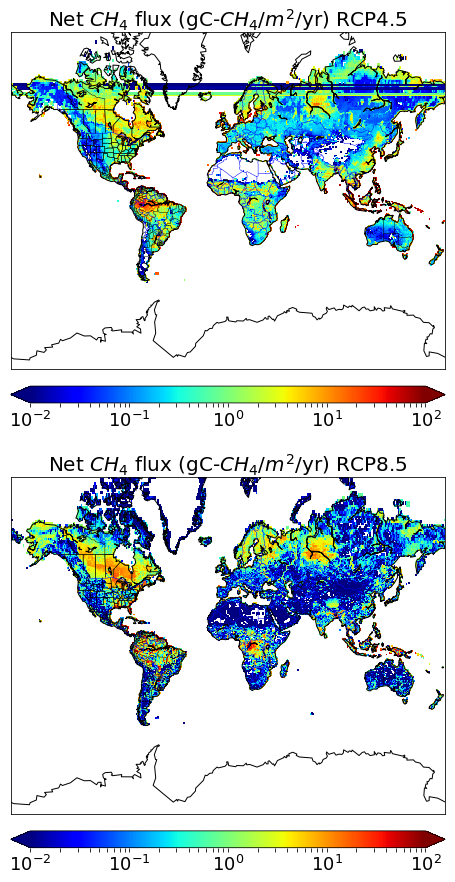

In [4]:
#http://matplotlib.org/basemap/users/mapsetup.html

fig = plt.figure(figsize=(15,15))

#ax1 = fig.add_subplot(221)
ax1 = fig.add_subplot(211)
ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) RCP4.5",fontsize=20)
#map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
#        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = N.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
# clevs = N.arange(0,7,0.5)
clevs = N.power(10.0, N.arange(-1.0,2.5,0.5))

#ncvar_maize[0,0,:,:][N.isnan(ncvar_maize[0,0,:,:])] = -9999
#maize[0,1,:,:][N.isnan(maize[0,1,:,:])] = -9999
# ncvar_maize[:,:] = ma.masked_where(ncvar_maize[:,:]<0,ncvar_maize[:,:])
# ncvar_maize[ncvar_maize>-1 and ncvar_maize < 0] = 0.01\
ncvar_maize = N.clip(ncvar_maize, 0.0, 100)
#ncvar_maize[0,0,:,:] = ma.masked_where(ncvar_maize[0,0,:,:]<=0,ncvar_maize[0,0,:,:])
#ncvar_maize[0,0,:,:] = ma.masked_where(maize[0,1,:,:]<=0,ncvar_maize[0,0,:,:])
mdata = maskoceans(lon, lat, ncvar_maize[:,:])

# cs1 = map.contourf(x,y,mdata,clevs,cmap=plt.cm.jet)
# cs1 = map.contourf(x,y,ncvar_maize[:,:], [100], colors="black")
cs1 = map.pcolormesh(x,y,ncvar_maize[:,:],
              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs1,location='bottom',pad="5%",extend='both')
#plt.title('Maize harvested area fraction')
cbar.ax.tick_params(labelsize=18) 


#ax2 = fig.add_subplot(222)
#ax2.set_title("Soil $CH_4$ oxidation (gC-$CH_4$/$m^2$/yr) RCP4.5",fontsize=20)
##map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
##        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=0,urcrnrlon=360,resolution='c')
## draw coastlines, state and country boundaries, edge of map.
##map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
#clevs = N.arange(0,7,0.5)
## clevs = N.power(10.0, N.arange(-1.0,2.5,0.5))
##clevs = [0,1.5,3,4.5,6,7.5,9,10.5,12,13.5,15]
## cs = map.contourf(x,y,maize[:,:],clevs,cmap=plt.cm.jet)

##maize[:,:] = ma.masked_where(maize[:,:]==0,ncvar_maize[:,:])

#cs = map.pcolormesh(x,y,maize[:,:],
#              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
#                                                      # omit this to use linear
#                                                     # color scale
#cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
#cbar.ax.tick_params(labelsize=18) 


ax1 = fig.add_subplot(212)
ax1.set_title("Net $CH_4$ flux (gC-$CH_4$/$m^2$/yr) RCP8.5",fontsize=20)
#map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
#        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=-180,urcrnrlon=180,resolution='c')
map = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# draw coastlines, state and country boundaries, edge of map.
map.drawcoastlines()
map.drawstates()
map.drawcountries(color='b')
lon,lat = N.meshgrid(lonnc2,latnc2) #Returns coordinate matrices from coordinate vectors
x,y = map(lon,lat)
# Transfer wetchat data to gCH4/m2/yr
# ncvar_maize2 = ncvar_maize2 * 365.0 / 1000.0
#clevs = N.arange(0,0.4,0.05)
#clevs = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
# cs = map.contourf(x,y,(fw_max[0,:,:]),clevs,cmap=plt.cm.jet)
ncvar_maize2 = N.clip(ncvar_maize2, 0., 100)
#cs = map.pcolormesh(x,y,ncvar_maize2[0,0,:,:],
cs = map.pcolormesh(x,y,pp[:,:],
              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
                                                      # omit this to use linear
                                                     # color scale
cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
cbar.ax.tick_params(labelsize=18) 
#cbar = map.colorbar(cs,location='bottom',pad="5%")
#cbar.ax.tick_params(labelsize=18) 


#ax1 = fig.add_subplot(224)
#ax1.set_title("Soil $CH_4$ oxidation (gC-$CH_4$/$m^2$/yr) RCP8.5",fontsize=20)
##map = Basemap(llcrnrlon=-119,llcrnrlat=23,urcrnrlon=-63,urcrnrlat=51,
##        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
#map = Basemap(projection='cyl', llcrnrlat=-90,urcrnrlat=90,\
#            llcrnrlon=0,urcrnrlon=360,resolution='c')
## draw coastlines, state and country boundaries, edge of map.
#map.drawcoastlines()
#map.drawstates()
#map.drawcountries(color='b')
##lon,lat = N.meshgrid(lonnc,latnc) #Returns coordinate matrices from coordinate vectors
##x,y = map(lon,lat)
##clevs = N.arange(0,0.4,0.05)
##clevs = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
##cs = map.contourf(x,y,(maize2[:,:]),clevs,cmap=plt.cm.jet)
##maize2[:,:] = ma.masked_where(maize2[:,:]==0,ncvar_maize2[:,:])
#cs = map.pcolormesh(x,y,maize2[:,:],
#              norm=colors.LogNorm(vmin=0.01, vmax=100),cmap=plt.cm.jet) # use log color scale,
#                                                      # omit this to use linear
#                                                     # color scale
#cbar = map.colorbar(cs,location='bottom',pad="5%",extend='both')
#cbar.ax.tick_params(labelsize=18) 

plt.show()
#plt.savefig('Comp_CH4.jpg',dpi=300)

In [ ]:
lonnc2

In [ ]:
lonnc2 % 360
